 # Basic Usage of py_SBeLT

## Installation

In [ ]:
!pip install sbelt

## Running

Once `sbelt` has been installed, we can import the `sbelt_runner` module. The sbelt_runner module is responsible for executing an instance of an py_SBeLT as it is described in py_SBeLT's [paper.md](https://github.com/szwiep/py_SBeLT/blob/master/paper/paper.md). 

In [3]:
from sbelt import sbelt_runner

The `sbelt_runner` module contains a function `run` which we will use to execute a run of py_SBeLT. If we do not pass any arguments to `run` then the default parameters (described in the [project's documentation]()) will be used. Let's start by using the default parameters.

In [5]:
sbelt_runner.run()

Building Bed and Model particle arrays...
Bed and Model particles built.
Model and event particle arrays will be written to ./sbelt-out.hdf5 every 1 iteration(s).
Beginning entrainments...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 121.38it/s]


Writting flux and age information to file...
Finished writing flux and age information.
Model run finished successfully.


And that's all it takes! We can see that there is now a file `./sbelt-out.hdf5` located in our directory. This file contains information from the sbelt run including the placement of all particles in the stream for each iteration and metrics such as average age over all particles each iteration. For more detail regarding the information stored and how to interact with it, see the project documentation and additional notebooks. 

But what if we don't want to use the default parameters but instead what to try our own? Let's try!

Let's execute a run of sbelt over **3000 iterations**, with a **bed length of 150 mm**, **3 subregions**, and the number of entrainment events per-iteration being sample from a poissoin distribution parameterized by **$\lambda$ = 2**. 

_Note_ that we will also need to create a new filename since we have already written to the default filename (`./sbelt-out.hdf5`) and `run` will not overwrite model files. Let's use `nondefault-sbelt`.

In [6]:
sbelt_runner.run(iterations=3000, bed_length=150, num_subregions=3, poiss_lambda=2, out_name='nondefault-sbelt')

Building Bed and Model particle arrays...
Bed and Model particles built.
Model and event particle arrays will be written to ./nondefault-sbelt.hdf5 every 1 iteration(s).
Beginning entrainments...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:26<00:00, 111.68it/s]


Writting flux and age information to file...
Finished writing flux and age information.
Model run finished successfully.


Now that we've got two files full of particle-related information, let's plot some of it!

## Plotting

The `sbelt` package comes with some basic plotting logic. We can access these functions with the following import:

In [7]:
from sbelt.plots import plotting

Each function in `plotting` will require information derived from the `sbelt.hdf5` files (as well a file names and save locations, if desired) which we created in the **Running** section. We will need to import both `numpy` and `h5py` into our envrionment to allow us to open/handle the `sbelt.hdf5` files and their stored data structures.

In [8]:
import numpy as np
import h5py

### Plotting the Stream

Let's start by plotting the stream at iteration 300 for both of our sbelt runs from **Running** (default and non-default parameters). Looking at the [API documentation](), we can see that `plotting.stream` requires 5 arguments: `iteration`, `bed_particles`, `model_particles`, `x_lim`, and `y_lim`.

In [11]:
iteration = 300
# y_lim is up to us and how we want the plot to look - not derived from hdf5 file!
y_lim = 10 

with h5py.File('sbelt-out.hdf5', 'r') as f:
    default_bed_particles = np.array(f['initial_values']['bed']) 
    default_model_particles_300 = np.array(f['iteration_299']['model'])
    # Let's plot the whole stream so let x_lim be the length of the bed
    default_x_lim = f['params']['bed_length'][()] 

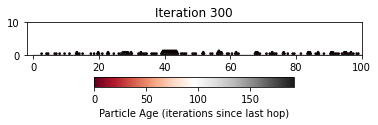

In [18]:
plotting.stream(iteration, default_bed_particles, default_model_particles_300, default_x_lim, y_lim)

In [16]:
# For non-default run

with h5py.File('nondefault-sbelt.hdf5', 'r') as f:
    nd_bed_particles = np.array(f['initial_values']['bed']) 
    nd_model_particles_300 = np.array(f['iteration_299']['model'])
    # Let's plot the whole stream so let x_lim be the length of the bed
    nd_x_lim = f['params']['bed_length'][()] 

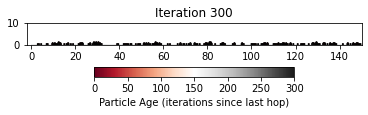

In [19]:
plotting.stream(iteration, nd_bed_particles, nd_model_particles_300, nd_x_lim, y_lim)

### Plotting the Downstream Particle Crossings

Next, let's plot a histogram and time-series of the particles crossings at the downstream boundary using the `downstream_boundary_hist` and `downstream_boundary_ts` functions, respectively. We will grab the required information (see [API documentation]()) from the `.hdf5` files similarly to how we did in **Plotting the Stream**.

In [22]:
# For the default run (change filename to try another run)

with h5py.File('sbelt-out.hdf5', 'r') as f:
    # Find how many subregions there are:
    default_num_subregions = f['params']['num_subregions'][()]
    # The get the ID of the downstream subregion
    downstream_key = default_num_subregions - 1 # (because subregions are named 0-(N-1))
    
    # Get the crossings at the final subregion:
    default_particle_crossing_list = np.array(f['final_metrics']['subregions'][f'subregion-{downstream_key}-flux'])
    default_iterations = f['params']['iterations'][()]


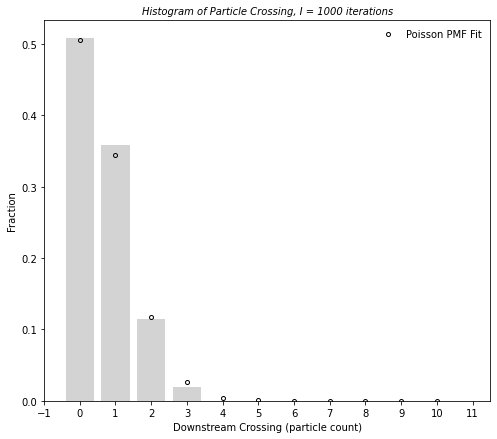

In [23]:
plotting.downstream_boundary_hist(default_particle_crossing_list, default_iterations)

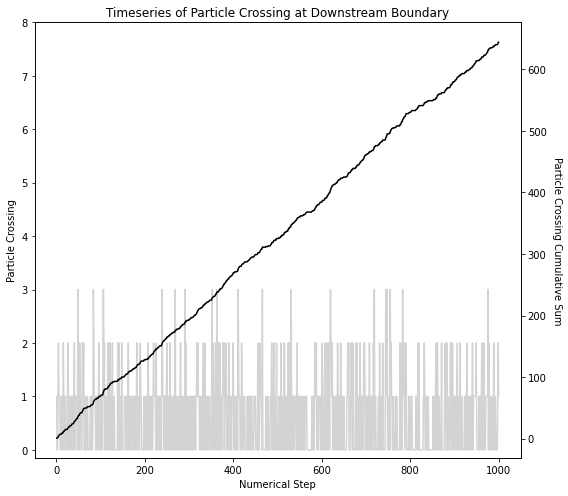

In [24]:
plotting.downstream_boundary_ts(default_particle_crossing_list, default_iterations, 1)

### Plotting the Downstream Particle Crossings with Age

Finally, let's use the final plotting function provided by `sbelt`, `crossing_info_age`. 

In [28]:
# For the default run (change filename to try another run)

with h5py.File('sbelt-out.hdf5', 'r') as f:
    # Find how many subregions there are:
    default_num_subregions = f['params']['num_subregions'][()]
    # The get the ID of the downstream subregion
    downstream_key = default_num_subregions - 1 # (because subregions are named 0-(N-1))
    
    # Get the crossings at the final subregion:
    default_particle_crossing_list = np.array(f['final_metrics']['subregions'][f'subregion-{downstream_key}-flux'])
    
    # Get average age and # of iterations
    default_avg_age = np.array(f['final_metrics']['avg_age'])
    default_iterations = f['params']['iterations'][()]

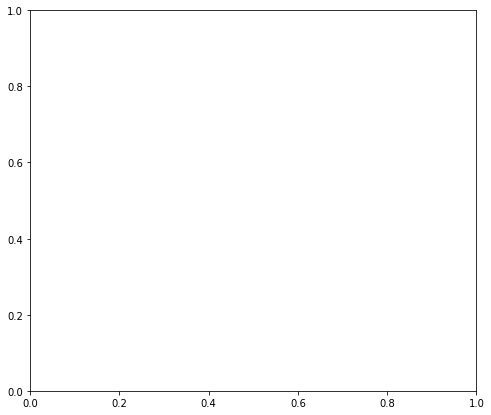

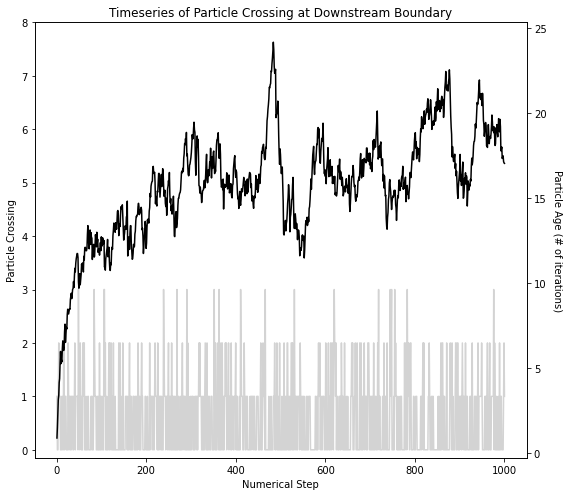

In [27]:
plotting.crossing_info_age(default_particle_crossing_list, default_avg_age, default_iterations, 1)